In [40]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs   #生成数据函数  
from sklearn import metrics

In [41]:
n_samples = 1500  
X,y = make_blobs(n_samples=n_samples,centers=4,random_state=170)  
X = StandardScaler().fit_transform(X)  #标准化
X.shape

(1500, 2)

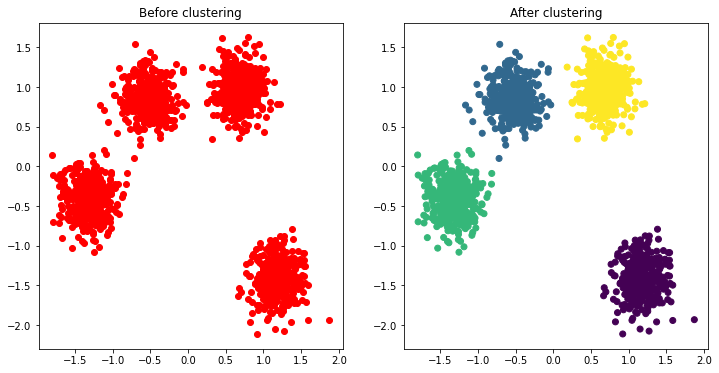

In [42]:
# Use KMeans library
Kmeans=KMeans(n_clusters=4,random_state=170) 
Kmeans.fit(X)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],c='r') 
plt.title("Before clustering")  
plt.subplot(122)  
plt.scatter(X[:,0],X[:,1],c=Kmeans.labels_)  
plt.title("After clustering")  
plt.show()

In [43]:
# https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
import numpy as np
import pandas as pd

data = pd.DataFrame(X)
data

,0,1
0,-0.640540,1.006334
1,0.449695,1.051193
2,-1.671067,-0.897232
3,0.665282,0.767903
4,-0.334135,0.866384
...,...,...
1495,-1.248090,-0.705225
1496,0.758133,1.174796
1497,1.083605,-1.714143
1498,0.770586,-1.337923


c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


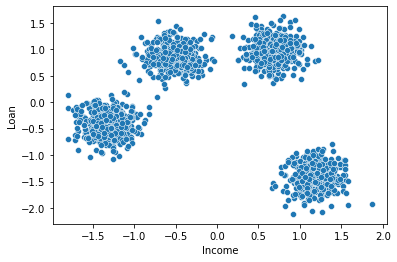

In [44]:
# Visualize the data points.

import seaborn as sns
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()

In [45]:
# Calculate WCSS
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

In [46]:
# Implement K-Means
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    while diff:
        # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

### How to choose K?

### 1.Elbow Method -- Within cluster sum of square 

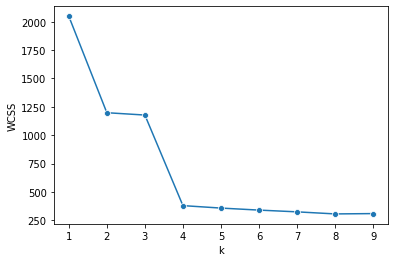

In [47]:
# Find K value using elbow method
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)
    
# Plot a line plot between WCSS and k
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

### 2.The Silhouette Method

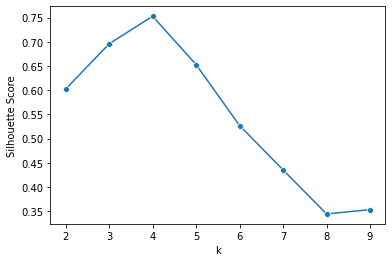

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# The Silhouette Method
sil_score = []
for k in range(2, 10):
    kmeans_model = KMeans(n_clusters = k).fit(X)
    labels = kmeans_model.labels_
    sil_score.append(silhouette_score(X, labels, metric = 'euclidean'))
    
sns.lineplot(x=range(2,10), y=sil_score, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

### Make clusters

In [20]:
# Make clusters
k = 4
centroids, cluster = kmeans(X, k)

c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


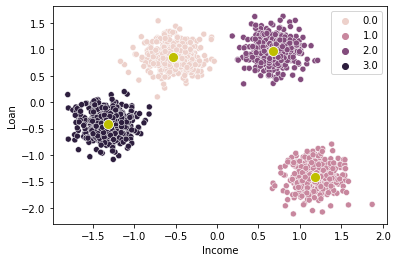

In [21]:
# Visualize the clusters formed
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Income')
plt.ylabel('Loan')
plt.show()